In [1]:
# Solve Equation Using Secant Method

f(x) = @. -x^4 + 3 * x^2 - x + 2

function secant_method(f, x0, x1, max_iter, tol)

    iter = 0;
    x_old = x0;
    x_new = x1
    x_hist = [x_old; x_new];

    while iter <= max_iter && abs(x_new - x_old) >= tol
        x_tmp = x_new
        x_new = x_new - f(x_new) * (x_new - x_old) / (f(x_new) - f(x_old))
        x_old = x_tmp;
        iter += 1;
        push!(x_hist, x_new);
    end

    return x_hist;
end

x_hist = secant_method(f, -2.5, -2.2, 100, 1e-6)

8-element Vector{Float64}:
 -2.5
 -2.2
 -2.0729006293385193
 -2.0134359468951657
 -2.0010185378034286
 -2.000014968606037
 -2.000000016838336
 -2.0000000000002784

In [2]:
# Find Theoretical Limit

m1 = 3.5
M2 = 69

c = 0.5 * M2 / m1

9.857142857142858

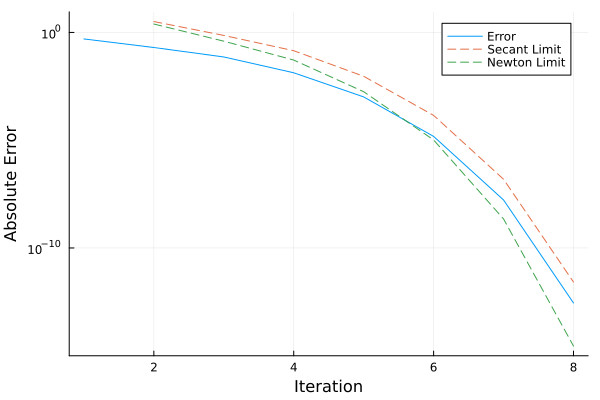

In [3]:
# Plot Numerical Errors

using Plots

x_star = -2

n = 1:length(x_hist)
err = abs.(x_hist .- x_star)
sec_err_lim = c * (err[1:end-1]) .^ ((sqrt(5) + 1) / 2)
new_err_lim = c * (err[1:end-1]) .^ 2

Plots.plot(n, err, yscale=:log10, xlabel="Iteration", ylabel="Absolute Error", label="Error")
Plots.plot!(n[2:end], sec_err_lim, linestyle=:dash, label="Secant Limit")
Plots.plot!(n[2:end], new_err_lim, linestyle=:dash, label="Newton Limit")